## Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope--a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

##### Name | Data Type | Measurement Unit | Description
Sex | nominal | -- | M, F, and I (infant)

Length | continuous | mm | Longest shell measurement

Diameter | continuous | mm | perpendicular to length

Height | continuous | mm | with meat in shell

Whole weight | continuous | grams | whole abalone

Shucked weight | continuous | grams | weight of meat

Viscera weight | continuous | grams | gut weight (after bleeding)

Shell weight | continuous | grams | after being dried

Rings | integer | -- | +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [218]:
#importing all the necessary libraries and modules

import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

In [219]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [220]:
df.isnull().sum() #checking for null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [222]:
#describing the data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Plotting

In [223]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

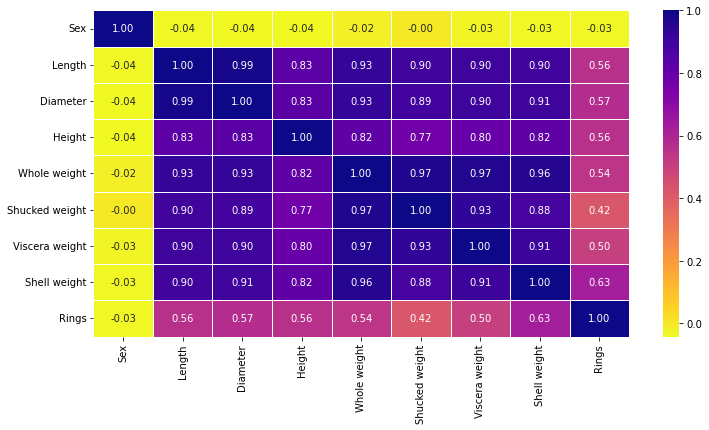

In [420]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.5,linecolor='w',cmap='plasma_r')

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

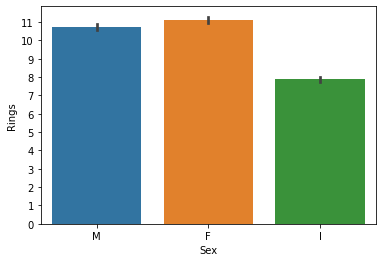

In [225]:
plt.yticks(np.arange(0,15))
sns.barplot(df['Sex'],df['Rings'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

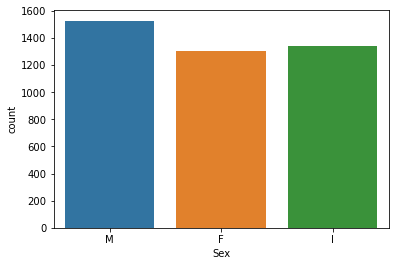

In [226]:
sns.countplot(df['Sex'])

In [227]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

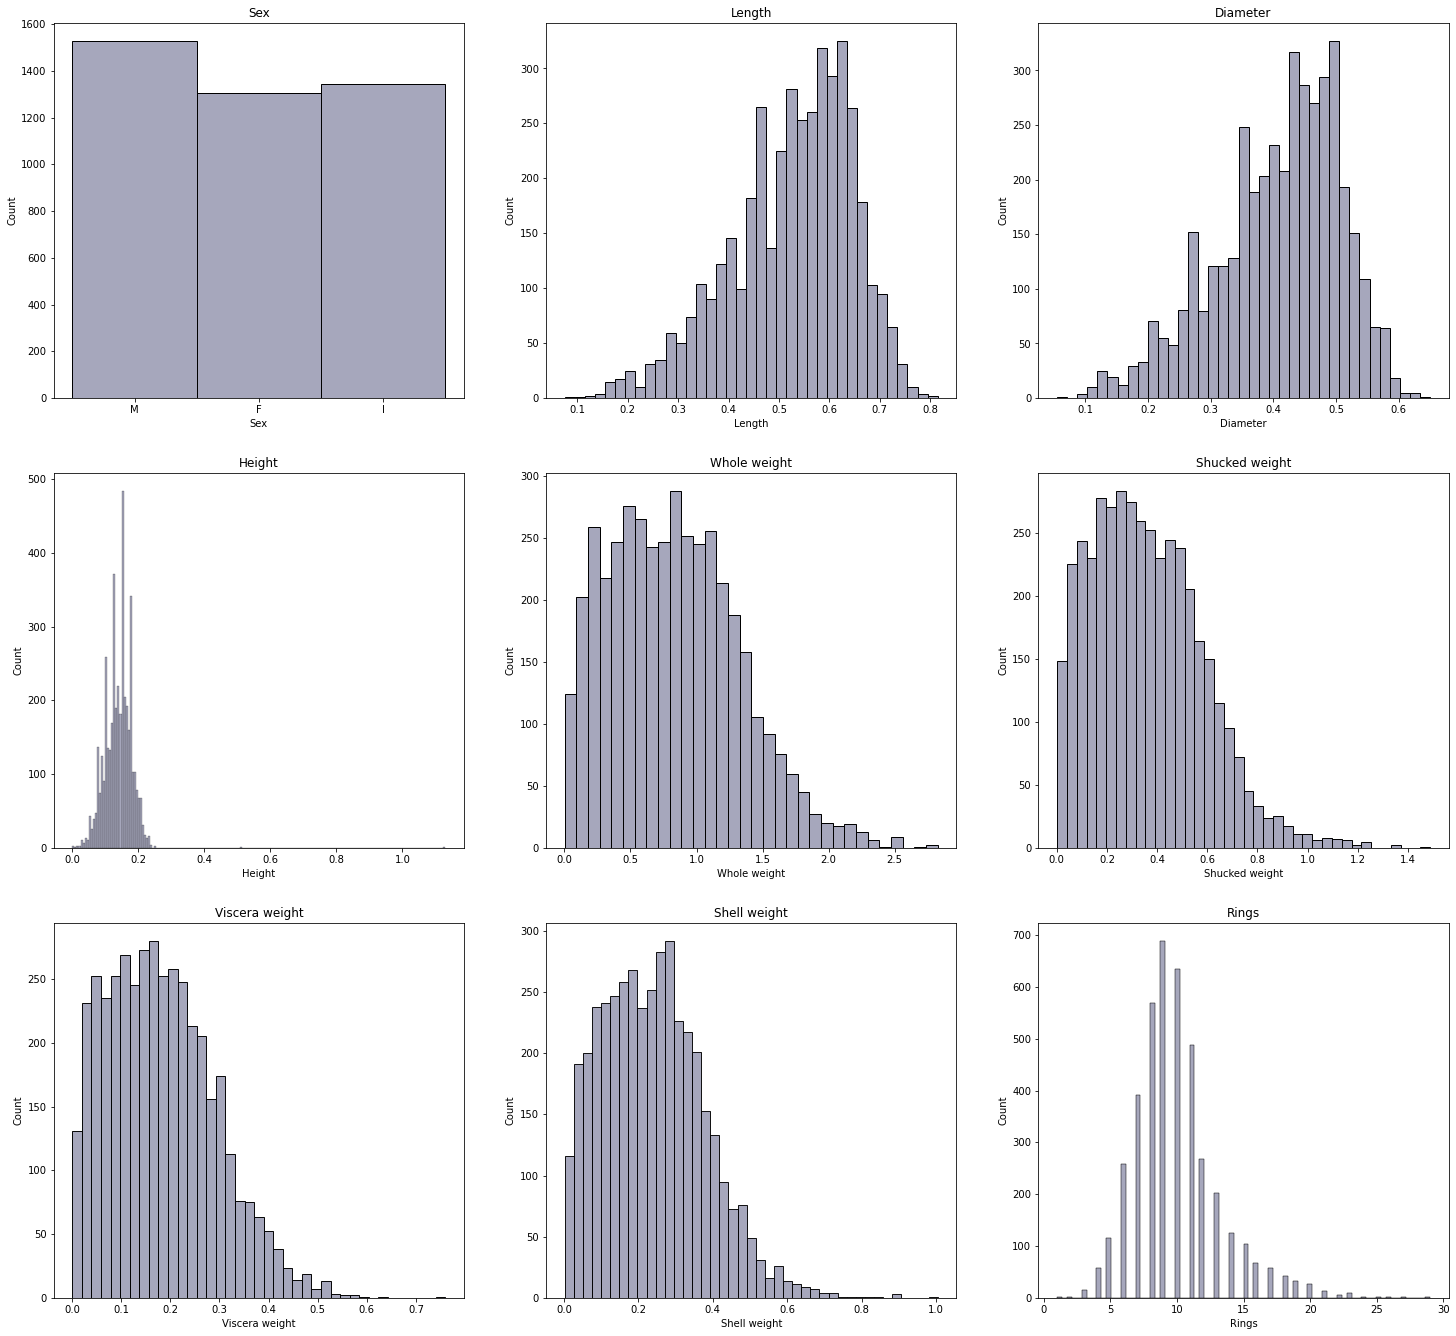

In [228]:
collist=df.columns.values
ncol=3
nrow=5

plt.figure(figsize=(25,40))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.histplot(data=df[collist[i]],color='#898AA6')
    plt.title(df.columns[i])

In [229]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

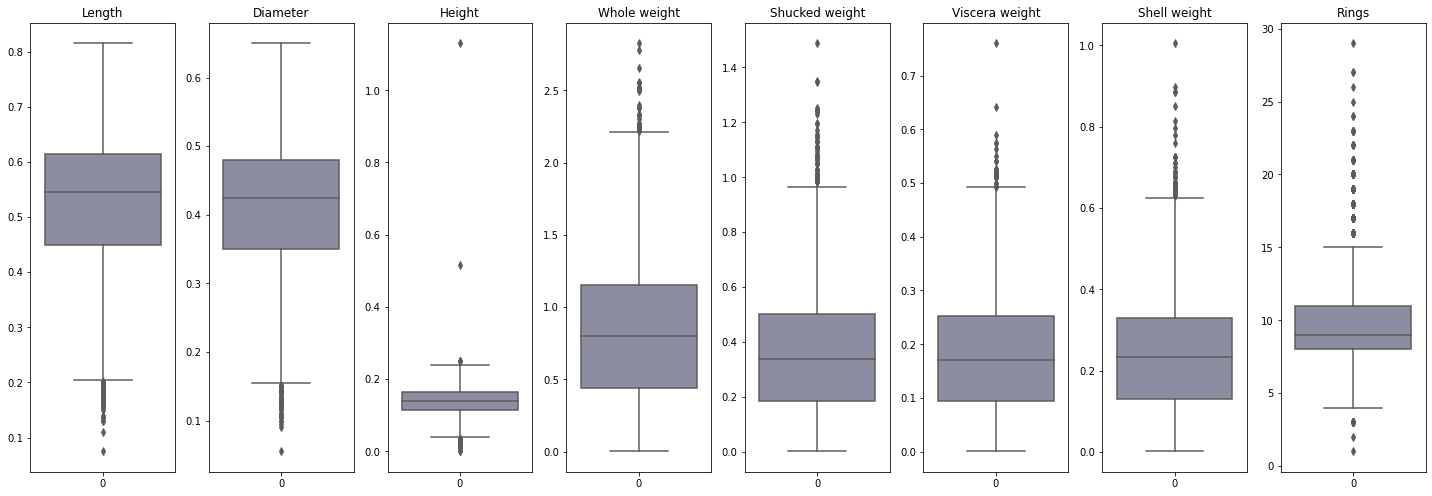

In [230]:
#outliers
df_continuous = df.drop('Sex',axis=1)
collist=df_continuous.columns.values
ncol=8
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_continuous[collist[i]],color='#898AA6')
    plt.title(df_continuous.columns[i])
    plt.tight_layout()

#### Converting all the data into one type

In [231]:
#coverting Rings to float
df['Rings'] = df['Rings'].astype(float)

In [232]:
#converting Sex to float using labelencoder
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])

In [233]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


#### Multicollinearity

In [361]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['Variables'] = df.columns
VIF['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
VIF

,Variables,VIF Factor
0,Sex,2.563825
1,Length,702.347884
2,Diameter,755.416018
3,Height,43.004758
4,Whole weight,436.141083
5,Shucked weight,117.686245
6,Viscera weight,64.740171
7,Shell weight,82.562895
8,Rings,21.652131


#### Removing outliers using zscore

In [235]:
#zscore

z=np.abs(zscore(df))
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [236]:
np.where(z>2.5)

(array([   6,    9,   32,   33,   43,   43,   44,   44,   72,   81,   83,
         128,  129,  129,  148,  148,  149,  149,  157,  163,  163,  163,
         164,  165,  165,  165,  165,  166,  166,  166,  167,  167,  168,
         169,  170,  170,  181,  232,  236,  236,  236,  236,  237,  237,
         237,  238,  238,  238,  239,  239,  256,  270,  275,  277,  277,
         278,  293,  294,  305,  305,  306,  306,  306,  310,  312,  313,
         314,  318,  321,  321,  334,  351,  355,  355,  355,  357,  358,
         358,  358,  358,  360,  362,  365,  372,  372,  375,  375,  416,
         417,  426,  427,  428,  429,  430,  431,  432,  433,  442,  449,
         450,  463,  465,  465,  468,  469,  478,  480,  483,  497,  501,
         520,  520,  523,  523,  525,  525,  526,  526,  530,  547,  547,
         572,  582,  592,  593,  611,  611,  613,  621,  628,  642,  658,
         660,  664,  672,  673,  674,  675,  678,  694,  694,  694,  696,
         696,  718,  718,  719,  719, 

In [237]:
df_new = df[(z<2.5).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4171,2,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8.0
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0


In [238]:
print ("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Percentage of data loss = 7.852525736174288 %


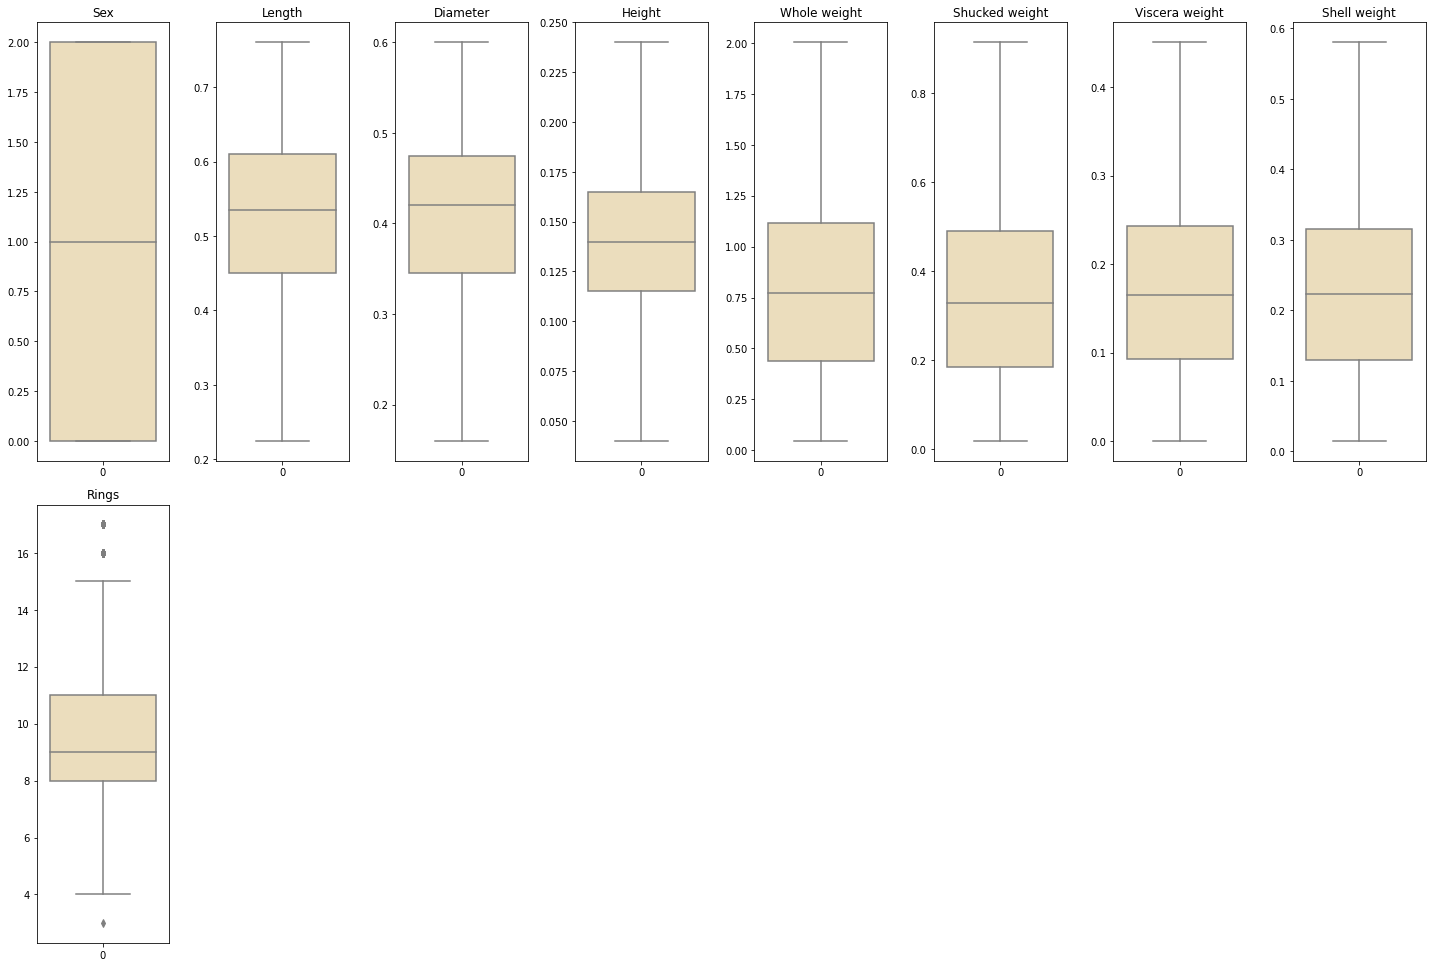

In [239]:
#looking at outliers after using zscore method

collist=df_new.columns.values
ncol=8
nrow=3

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df_new[collist[i]],color='#F3E0B5')
    plt.title(df_new.columns[i])
    plt.tight_layout()

#### Seperating into X & Y

In [247]:
x = df_new.drop('Rings',axis=1)
y = df_new['Rings']

#### Reducing Skewness using PowerTransform

In [282]:
#skewness before powertransform
PT = pd.DataFrame({'Before PowerTransform':df.skew()})
PT

,Before PowerTransform
Sex,-0.098155
Length,-0.639873
Diameter,-0.609198
Height,3.128817
Whole weight,0.530959
Shucked weight,0.719098
Viscera weight,0.591852
Shell weight,0.620927
Rings,1.114102


In [248]:
#PowerTransform
from sklearn.preprocessing import power_transform

x = power_transform(x, method='yeo-johnson')
x

array([[ 1.1355971 , -0.70476523, -0.55385586, ..., -0.55329675,
        -0.70278282, -0.59690198],
       [ 1.1355971 , -1.4748913 , -1.46069857, ..., -1.34733999,
        -1.36816825, -1.37025055],
       [-1.31495868, -0.03437248,  0.05413031, ..., -0.36902736,
        -0.23878038, -0.06874257],
       ...,
       [ 1.1355971 ,  0.58314914,  0.29654693, ...,  0.56332051,
         0.50565185,  0.34577693],
       [ 1.1355971 ,  0.69358241,  0.7499521 , ...,  0.94646164,
         1.15092079,  0.71320287],
       [-1.31495868,  0.97947564,  0.8865735 , ...,  0.96973656,
         0.92692643,  0.62232046]])

In [283]:
#creating a dataframe to store the x data
temp_x = pd.DataFrame(x,columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                                   'Viscera weight', 'Shell weight'])
aPT = pd.DataFrame({'After Power Transform':temp_x.skew()})
PT = pd.concat([PT[1:8],aPT[1:8]],axis=1)
PT

,Before PowerTransform,After Power Transform
Length,-0.639873,-0.084795
Diameter,-0.609198,-0.080969
Height,3.128817,-0.015935
Whole weight,0.530959,-0.020508
Shucked weight,0.719098,0.020713
Viscera weight,0.591852,0.034355
Shell weight,0.620927,0.014561


In [285]:
print("The mean is",x.mean())
print("The STD is",x.std()) 

The mean is 1.015324771805807e-17
The STD is 1.0


In [370]:
#checking VIF after PowerTransform
VIF_aPT = pd.DataFrame()
VIF_aPT['VIF Factor after PT'] = [variance_inflation_factor(temp_x.values,i) for i in range(temp_x.shape[1])]
merged_VIF = pd.concat([VIF[0:8],VIF_aPT],axis=1)

,Variables,VIF Factor,VIF Factor after PT
0,Sex,2.563825,1.011234
1,Length,702.347884,33.573832
2,Diameter,755.416018,32.226714
3,Height,43.004758,6.246685
4,Whole weight,436.141083,128.244496
5,Shucked weight,117.686245,34.942979
6,Viscera weight,64.740171,20.682086
7,Shell weight,82.562895,27.913510


#### Model Building

In [286]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [290]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg_para = {'C':[1,10],'penalty':['l1','l2','elasticnet','none'],'random_state':[1,51],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
gsCV_lg = GridSearchCV(lg,lg_para)
gsCV_lg.fit(x_train,y_train)
gsCV_lg.best_params_

{'C': 1, 'penalty': 'none', 'random_state': 1, 'solver': 'sag'}

In [327]:
lg = LogisticRegression(C=1,penalty='none',random_state=1,solver='sag')
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
#lg_score = accuracy_score(y_test,lg_pred)
lg_r2 = r2_score(y_test,lg_pred)
lg_mse = mean_squared_error(y_test,lg_pred)
lg_rmse = mean_squared_error(y_test,lg_pred,squared=False)
lg_mae = mean_absolute_error(y_test,lg_pred)
#print("Logistic Regression score:",round(lg_score*100,2),'%')
print("LogisticR R2 Score:",round(lg_r2*100,2),'%')
print("LogisticR MSE:",lg_mse)
print("LogisticR MAE:",lg_mae)
print("LogisticR Root MSE:",lg_rmse)

LogisticR R2 Score: 37.86 %
LogisticR MSE: 4.127272727272727
LogisticR MAE: 1.4337662337662338
LogisticR Root MSE: 2.031569030890343


In [309]:
#LinearRegression() 

lreg = LinearRegression()
lreg.fit(x_train,y_train)
lreg_pred = lreg.predict(x_test)
lreg_r2 = r2_score(y_test,lreg_pred)
lreg_mae = mean_absolute_error(y_test,lreg_pred)
lreg_mse = mean_squared_error(y_test,lreg_pred)
lreg_rmse = mean_squared_error(y_test,lreg_pred,squared=False)
print ("r2 Score:",round(lreg_r2*100,2),'%')
print ("Mean Absolute Error:",lreg_mae)
print ("Mean Squared Error:",lreg_mse)
print ("Root Mean Squared Error:",lreg_rmse)

r2 Score: 46.35 %
Mean Absolute Error: 1.4268374104137371
Mean Squared Error: 3.563453102702629
Root Mean Squared Error: 1.8877110750066148


In [312]:
#RandomForestRegressor

rfr = RandomForestRegressor()
rfr_para = {'n_estimators':range(0,250,50),'criterion':['squared_error','absolute_error','poisson'],'random_state':[1,50]}
gsCV_rfr = GridSearchCV(rfr,rfr_para)
gsCV_rfr.fit(x_train,y_train)
gsCV_rfr.best_params_

{'criterion': 'poisson', 'n_estimators': 100, 'random_state': 50}

In [315]:
rfr = RandomForestRegressor(n_estimators=100,criterion='poisson',random_state=50)
rfr.fit(x_train,y_train)
rfr_y_pred = rfr.predict(x_test)
rfr_r2 = r2_score(y_test,rfr_y_pred)
rfr_mae = mean_absolute_error(y_test,rfr_y_pred)
rfr_mse = mean_squared_error(y_test,rfr_y_pred)
rfr_rmse = mean_squared_error(y_test,rfr_y_pred,squared=False)
print ("r2 Score:",round(rfr_r2*100,2),'%')
print ("Mean Absolute Error:",rfr_mae)
print ("Mean Squared Error:",rfr_mse)
print ("Root Mean Squared Error:",rfr_rmse)

r2 Score: 39.85 %
Mean Absolute Error: 1.4886363636363635
Mean Squared Error: 3.9946422077922077
Root Mean Squared Error: 1.9986601031171378


In [313]:
#Ridge()

r = Ridge()
r.fit(x_train,y_train)
r_y_pred = r.predict(x_test)
r_r2 = r2_score(y_test,r_y_pred)
r_mae = mean_absolute_error(y_test,r_y_pred)
r_mse = mean_squared_error(y_test,r_y_pred)
r_rmse = mean_squared_error(y_test,r_y_pred,squared=False)
print ("r2 Score:",round(r_r2*100,2),'%')
print ("Mean Absolute Error:",r_mae)
print ("Mean Squared Error:",r_mse)
print ("Root Mean Squared Error:",r_rmse)

r2 Score: 46.33 %
Mean Absolute Error: 1.4271672485355038
Mean Squared Error: 3.5643646236972244
Root Mean Squared Error: 1.88795249508488


In [314]:
#Lasso()

l = Lasso()
l.fit(x_train,y_train)
l_y_pred = l.predict(x_test)
l_r2 = r2_score(y_test,l_y_pred)
l_mae = mean_absolute_error(y_test,l_y_pred)
l_mse = mean_squared_error(y_test,l_y_pred)
l_rmse = mean_squared_error(y_test,l_y_pred,squared=False)
print ("r2 Score:",round(l_r2*100,2),'%')
print ("Mean Absolute Error:",l_mae)
print ("Mean Squared Error:",l_mse)
print ("Root Mean Squared Error:",l_rmse)

r2 Score: 23.23 %
Mean Absolute Error: 1.7127186852010419
Mean Squared Error: 5.098757180198338
Root Mean Squared Error: 2.258042776432355


In [316]:
#SupportVectorRegression()

svr=SVR()
svr_para = {'kernel':['linear','poly','rbf','sigmoid'],'C':[1,10],'gamma':['scale','auto']}
gsCV_svr = GridSearchCV(svr,svr_para)
gsCV_svr.fit(x_train,y_train)
gsCV_svr.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [317]:
svr = SVR(kernel='rbf',C=10,gamma='auto')
svr.fit(x_train,y_train)
svr_y_pred = svr.predict(x_test)
svr_r2 = r2_score(y_test,svr_y_pred)
svr_mae = mean_absolute_error(y_test,svr_y_pred)
svr_mse = mean_squared_error(y_test,svr_y_pred)
svr_rmse = mean_squared_error(y_test,svr_y_pred,squared=False)
print ("r2 Score:",round(svr_r2*100,2),'%')
print ("Mean Absolute Error:",svr_mae)
print ("Mean Squared Error:",svr_mse)
print ("Root Mean Squared Error:",svr_rmse)

r2 Score: 49.35 %
Mean Absolute Error: 1.3425689558529632
Mean Squared Error: 3.364227095534051
Root Mean Squared Error: 1.8341829503989102


In [320]:
#GradientBoostingRegression()

gbr = GradientBoostingRegressor()
gbr_para = {'n_estimators':range(0,250,50),'loss':['squared_error','absolute_error','huber','quantile'],'criterion':['friedman_mse','squared_error','mse'],'random_state':[1,50]}
gsCV_gbr = GridSearchCV(gbr,gbr_para)
gsCV_gbr.fit(x_train,y_train)
gsCV_gbr.best_params_

{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 150, 'random_state': 50}

In [321]:
gbr = GradientBoostingRegressor(n_estimators=150,criterion='mse',loss='huber',random_state=50)
gbr.fit(x_train,y_train)
gbr_y_pred = gbr.predict(x_test)
gbr_r2 = r2_score(y_test,gbr_y_pred)
gbr_mae = mean_absolute_error(y_test,gbr_y_pred)
gbr_mse = mean_squared_error(y_test,gbr_y_pred)
gbr_rmse = mean_squared_error(y_test,gbr_y_pred,squared=False)
print ("r2 Score:",round(gbr_r2*100,2),'%')
print ("Mean Absolute Error:",gbr_mae)
print ("Mean Squared Error:",gbr_mse)
print ("Root Mean Squared Error:",gbr_rmse)

r2 Score: 46.69 %
Mean Absolute Error: 1.3680146155583948
Mean Squared Error: 3.5406319372717623
Root Mean Squared Error: 1.8816567001639173


In [322]:
#KNeighborsRegression()

knr = KNeighborsRegressor()
knr_para = {'n_neighbors':range(0,10),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
gsCV_knr = GridSearchCV(knr,knr_para)
gsCV_knr.fit(x_train,y_train)
gsCV_knr.best_params_

{'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}

In [323]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr_y_pred = knr.predict(x_test)
knr_r2 = r2_score(y_test,knr_y_pred)
knr_mae = mean_absolute_error(y_test,knr_y_pred)
knr_mse = mean_squared_error(y_test,knr_y_pred)
knr_rmse = mean_squared_error(y_test,knr_y_pred,squared=False)
print ("r2 Score:",round(knr_r2*100,2),'%')
print ("Mean Absolute Error:",knr_mae)
print ("Mean Squared Error:",knr_mse)
print ("Root Mean Squared Error:",knr_rmse)

r2 Score: 42.56 %
Mean Absolute Error: 1.4618181818181817
Mean Squared Error: 3.8149610389610396
Root Mean Squared Error: 1.9531925248067687


In [371]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada_para = {'n_estimators':range(0,250,50),'loss':['linear','square','exponential'],'random_state':[0,50]}
gsCV_ada = GridSearchCV(ada,ada_para)
gsCV_ada.fit(x_train,y_train)
gsCV_ada.best_params_

{'loss': 'linear', 'n_estimators': 50, 'random_state': 50}

In [372]:
ada = AdaBoostRegressor(loss='linear',n_estimators=50,random_state=50)
ada.fit(x_train,y_train)
ada_y_pred = ada.predict(x_test)
ada_r2 = r2_score(y_test,ada_y_pred)
ada_mae = mean_absolute_error(y_test,ada_y_pred)
ada_mse = mean_squared_error(y_test,ada_y_pred)
ada_rmse = mean_squared_error(y_test,ada_y_pred,squared=False)
print ("r2 Score:",round(ada_r2*100,2),'%')
print ("Mean Absolute Error:",ada_mae)
print ("Mean Squared Error:",ada_mse)
print ("Root Mean Squared Error:",ada_rmse)

r2 Score: 40.41 %
Mean Absolute Error: 1.60711144890879
Mean Squared Error: 3.9577044312298897
Root Mean Squared Error: 1.9893980072448776


#### Comparing all the models

In [376]:
R2 = []
MSE = []
MAE = []
RMSE = []
CV = []
accuracy = []
model_name = []

models = {'Logistic Regression':lg,'RandomForestRegression':rfr,'SupportVectorRegression':svr, 'ADABoostRegression':ada,
         'KNeighborsRegression':knr,'GradientBoostingRegression':gbr,'LinearRegression':lreg,'Lasso':l,'Ridge':r}

for i in models.keys():
    model = models[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_score = model.score(x_test,y_test)
    cv_score = cross_val_score(models[i],x,y).mean()
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    R2_S = r2_score(y_test,y_pred)
    print('-'*50)
    print("Model:",i)
    model_name.append(i)
    print("Accuracy:",round(test_score*100,2))
    accuracy.append(round(test_score*100,2))
    print("R2 Score:",round(R2_S*100,2))
    R2.append(round(R2_S*100,2))
    print("CV Score:",round(cv_score*100,2))
    CV.append(round(cv_score*100,2))
    print("MAE:",mae)
    MAE.append(mae)
    print("MSE:",mse)
    MSE.append(mse)
    print("RMSE:",rmse)
    RMSE.append(rmse)

--------------------------------------------------
Model: Logistic Regression
Accuracy: 25.45
R2 Score: 37.86
CV Score: 27.72
MAE: 1.4337662337662338
MSE: 4.127272727272727
RMSE: 2.031569030890343
--------------------------------------------------
Model: RandomForestRegression
Accuracy: 39.85
R2 Score: 39.85
CV Score: 31.59
MAE: 1.4886363636363635
MSE: 3.9946422077922077
RMSE: 1.9986601031171378
--------------------------------------------------
Model: SupportVectorRegression
Accuracy: 49.35
R2 Score: 49.35
CV Score: 48.98
MAE: 1.3425689558529632
MSE: 3.364227095534051
RMSE: 1.8341829503989102
--------------------------------------------------
Model: ADABoostRegression
Accuracy: 40.41
R2 Score: 40.41
CV Score: 21.68
MAE: 1.60711144890879
MSE: 3.9577044312298897
RMSE: 1.9893980072448776
--------------------------------------------------
Model: KNeighborsRegression
Accuracy: 42.56
R2 Score: 42.56
CV Score: 39.15
MAE: 1.4618181818181817
MSE: 3.8149610389610396
RMSE: 1.9531925248067687
---

In [379]:
model_df = pd.DataFrame({'Model':model_name,'Accuracy':accuracy,'CV Score':CV,'R2 Score':R2,'MSE':MSE,
                        'RMSE':RMSE,'MAE':MAE})
model_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,CV Score,R2 Score,MSE,RMSE,MAE
2,SupportVectorRegression,49.35,48.98,49.35,3.364227,1.834183,1.342569
5,GradientBoostingRegression,46.69,45.95,46.69,3.540632,1.881657,1.368015
6,LinearRegression,46.35,40.73,46.35,3.563453,1.887711,1.426837
8,Ridge,46.33,40.73,46.33,3.564365,1.887952,1.427167
4,KNeighborsRegression,42.56,39.15,42.56,3.814961,1.953193,1.461818
3,ADABoostRegression,40.41,21.68,40.41,3.957704,1.989398,1.607111
1,RandomForestRegression,39.85,31.59,39.85,3.994642,1.998660,1.488636
0,Logistic Regression,25.45,27.72,37.86,4.127273,2.031569,1.433766
7,Lasso,23.23,11.26,23.23,5.098757,2.258043,1.712719


#### Saving the file

In [380]:
file = "Abalone_DataTrained"
pickle.dump(model_df,open(file,'wb'))